## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [19]:
import os
import keras

# 請嘗試設定 GPU：os.environ => 本電腦無GPU

In [20]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
import numpy as np
def preproc_x(x, flatten=True):
    x = (((x - np.min(x)) / (np.max(x) - np.min(x)))-0.5)*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num)
    return y

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [24]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [25]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0825 23:47:18.524415 4707046848 deprecation.py:323] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0825 23:47:18.611611 4707046848 deprecation_wrapper.py:119] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 204us/step - loss: 1.7689 - acc: 0.3652 - val_loss: 1.6053 - val_acc: 0.4301
Epoch 2/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.5206 - acc: 0.4631 - val_loss: 1.5134 - val_acc: 0.4694
Epoch 3/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.3823 - acc: 0.5142 - val_loss: 1.4317 - val_acc: 0.4941
Epoch 4/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.2820 - acc: 0.5485 - val_loss: 1.4026 - val_acc: 0.5119
Epoch 5/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.1949 - acc: 0.5790 - val_loss: 1.3632 - val_acc: 0.5227
Epoch 6/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.1020 - acc: 0.6126 - val_loss: 1.3549 - val_acc: 0.5340
Epoch 7/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.0247 - acc: 0.6374 - val_loss: 

50000/50000 [==============================] - 9s 179us/step - loss: 0.0724 - acc: 0.9766 - val_loss: 3.1256 - val_acc: 0.5423
Epoch 60/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.0721 - acc: 0.9768 - val_loss: 3.2065 - val_acc: 0.5404
Epoch 61/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.0785 - acc: 0.9753 - val_loss: 3.0873 - val_acc: 0.5387
Epoch 62/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.0652 - acc: 0.9791 - val_loss: 3.2994 - val_acc: 0.5405
Epoch 63/100
50000/50000 [==============================] - 9s 182us/step - loss: 0.0818 - acc: 0.9741 - val_loss: 3.2797 - val_acc: 0.5423
Epoch 64/100
50000/50000 [==============================] - 9s 181us/step - loss: 0.0692 - acc: 0.9778 - val_loss: 3.2397 - val_acc: 0.5383
Epoch 65/100
50000/50000 [==============================] - 9s 183us/step - loss: 0.0707 - acc: 0.9769 - val_loss: 3.1396 - val_acc: 0.5455
Epoch 66/100
50000/50000 [=======

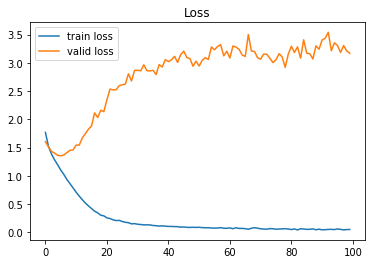

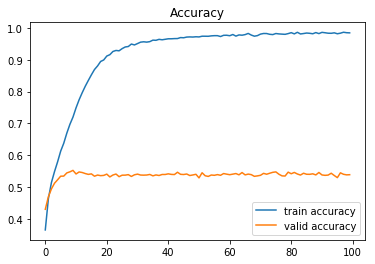

In [28]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()